### Mask R-CNN is the current state-of-the-art for image segmentation and runs at 5 fps


Mask R-CNN is an extension of the popular Faster R-CNN object detection architecture. Mask R-CNN adds a branch to the already existing Faster R-CNN outputs. The Faster R-CNN method generates two things for each object in the image:

Its class
The bounding box coordinates

**We take an image as input and pass it to the ConvNet, which returns the feature map for that image
Region proposal network (RPN) is applied on these feature maps. This returns the object proposals along with their objectness score
A RoI pooling layer is applied on these proposals to bring down all the proposals to the same size
Finally, the proposals are passed to a fully connected layer to classify and output the bounding boxes for objects. It also returns the mask for each proposal**

<img src="./Images/Mask-R-CNN.png" alt="SSD_Mobilenet" width="500" height="600">


### Here we are using MASK RCNN Model which is pretrained on COCO Dataset

### Importing necessary Libraries

In [5]:
from mrcnn.config import Config
from mrcnn import model as modellib
from mrcnn import visualize
import cv2
import colorsys
import argparse
import imutils
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Using TensorFlow backend.


In [6]:
print(tf.__version__)

1.14.0


In [7]:
class SimpleConfig(Config):
    # give the configuration a recognizable name
    NAME = "coco_inference"
    # set the number of GPUs to use along with the number of images
    # per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    # number of classes on COCO dataset
    NUM_CLASSES = 81

In [8]:
config = SimpleConfig()
config.display()




Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [9]:
model = modellib.MaskRCNN(mode="inference", config=config, model_dir=os.getcwd())



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [10]:
model.load_weights("mask_rcnn_coco.h5", by_name=True)

In [14]:
#img="C:\\Users\\shrey\\PycharmProjects\\Test\\Mask_RCNN\\images\\bremen_000063_000019_leftImg8bit"
#img="Boston"

#image = cv2.imread("C:\\Users\\shrey\\PycharmProjects\\Test\\Mask_RCNN\\images\\12283150_12d37e6389_z.jpg")
#image = cv2.imread("./images/bremen_000067_000019_leftImg8bit.png")
#"./images/bremen_000064_000019_leftImg8bit.png"
image = cv2.imread("./images/Boston.jfif")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = imutils.resize(image, width=512)
# perform a forward pass of the network to obtain the results
print("[INFO] making predictions with Mask R-CNN...")
result = model.detect([image], verbose=1)

[INFO] making predictions with Mask R-CNN...
Processing 1 images
image                    shape: (259, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32



In [15]:
CLASS_NAMES = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [16]:
result

[{'rois': array([[106,  23, 223, 308]]),
  'class_ids': array([6]),
  'scores': array([0.8439963], dtype=float32),
  'masks': array([[[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         ...,
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]]])}]

In [18]:
CLASS_NAMES

['BG',
 'person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

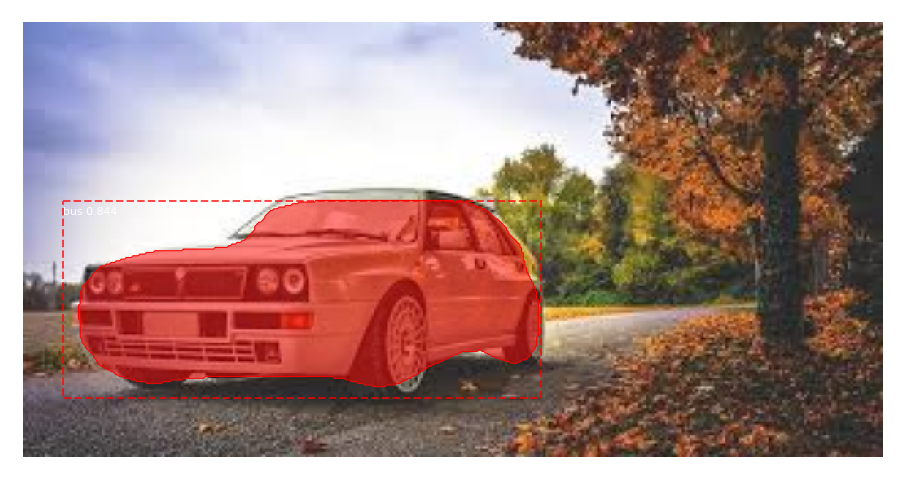

In [23]:
r1 = result[0]
visualize.display_instances(image, r1['rois'], r1['masks'],   r1['class_ids'], CLASS_NAMES, r1['scores'])

In [20]:
r1 = result[0]

In [21]:
r1

{'rois': array([[106,  23, 223, 308]]),
 'class_ids': array([6]),
 'scores': array([0.8439963], dtype=float32),
 'masks': array([[[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],
 
        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],
 
        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],
 
        ...,
 
        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],
 
        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],
 
        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]]])}

In [32]:
def Mask_RCNN(img):
    image = cv2.imread(img)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = imutils.resize(image, width=512)
    # perform a forward pass of the network to obtain the results
    print("[INFO] making predictions with Mask R-CNN...")
    result = model.detect([image], verbose=1)
    r1 = result[0]
    #print(r1)
    visualize.display_instances(image, r1['rois'], r1['masks'],   r1['class_ids'], CLASS_NAMES, r1['scores'])

[INFO] making predictions with Mask R-CNN...
Processing 1 images
image                    shape: (384, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


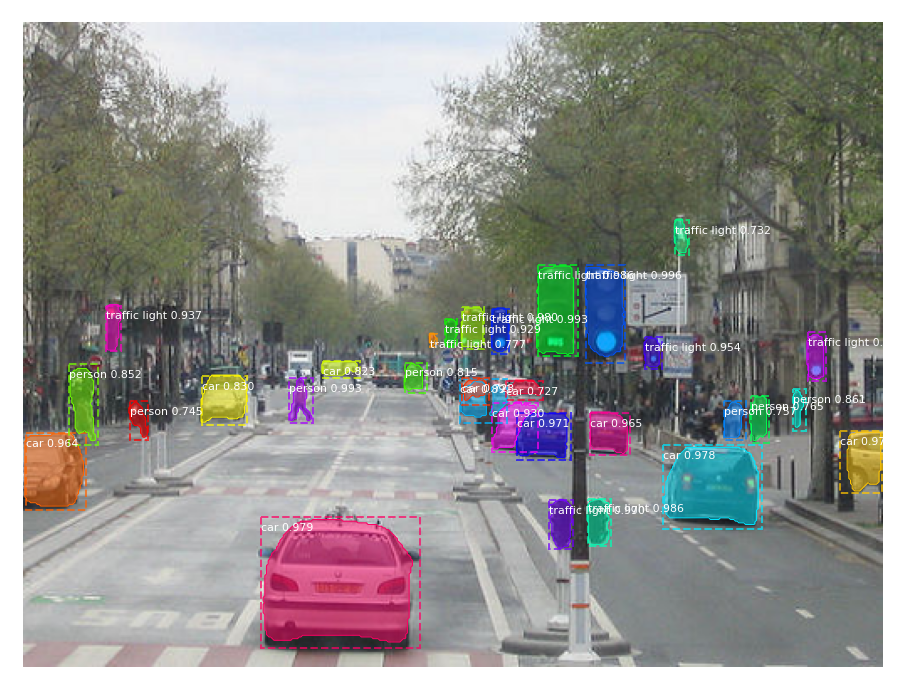

In [33]:
Mask_RCNN("./images/12283150_12d37e6389_z.jpg")

[INFO] making predictions with Mask R-CNN...
Processing 1 images
image                    shape: (392, 512, 3)         min:    1.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


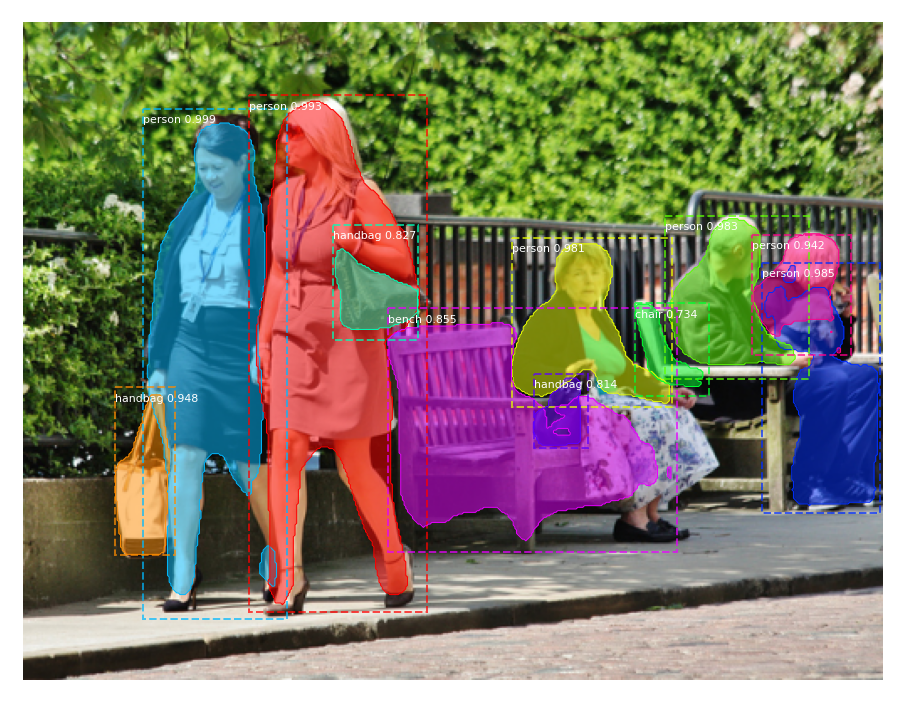

In [34]:
Mask_RCNN("./images/9247489789_132c0d534a_z.jpg")

[INFO] making predictions with Mask R-CNN...
Processing 1 images
image                    shape: (392, 512, 3)         min:    1.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


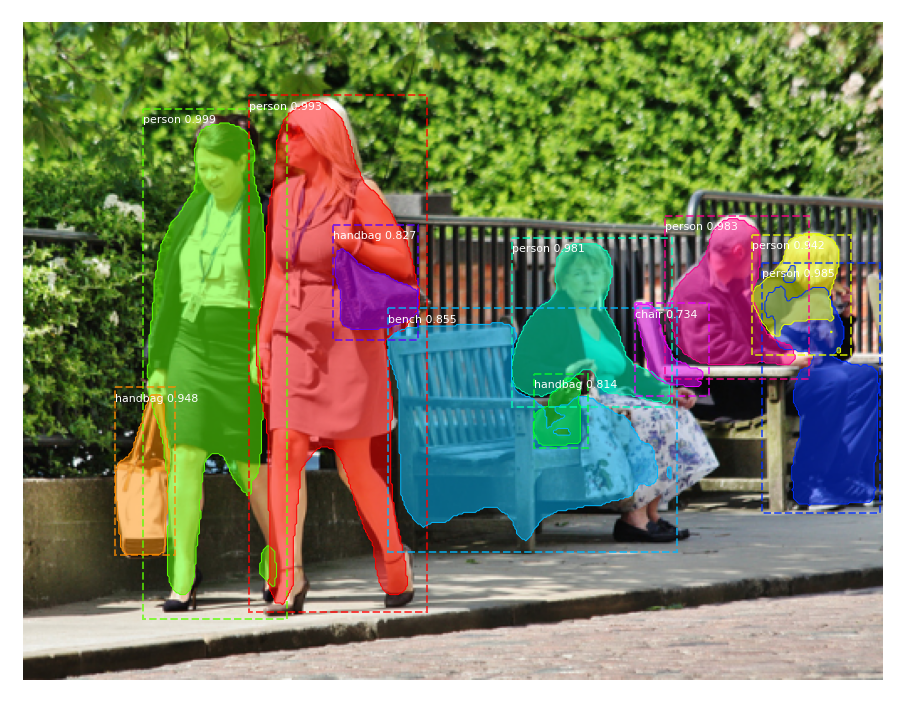

In [35]:
Mask_RCNN("./images/9247489789_132c0d534a_z.jpg")

In [36]:
temp=['.\\object_detection\\leftImg8bit\\val\\frankfurt\\frankfurt_000000_000294_leftImg8bit.png',
      '.\\object_detection\\leftImg8bit\\val\\frankfurt\\frankfurt_000000_000576_leftImg8bit.png',
      '.\\object_detection\\leftImg8bit\\val\\frankfurt\\frankfurt_000000_001016_leftImg8bit.png',
      '.\\object_detection\\leftImg8bit\\val\\lindau\\lindau_000000_000019_leftImg8bit.png',
      '.\\object_detection\\leftImg8bit\\val\\munster\\munster_000016_000019_leftImg8bit.png',
     ]


[INFO] making predictions with Mask R-CNN...
Processing 1 images
image                    shape: (256, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


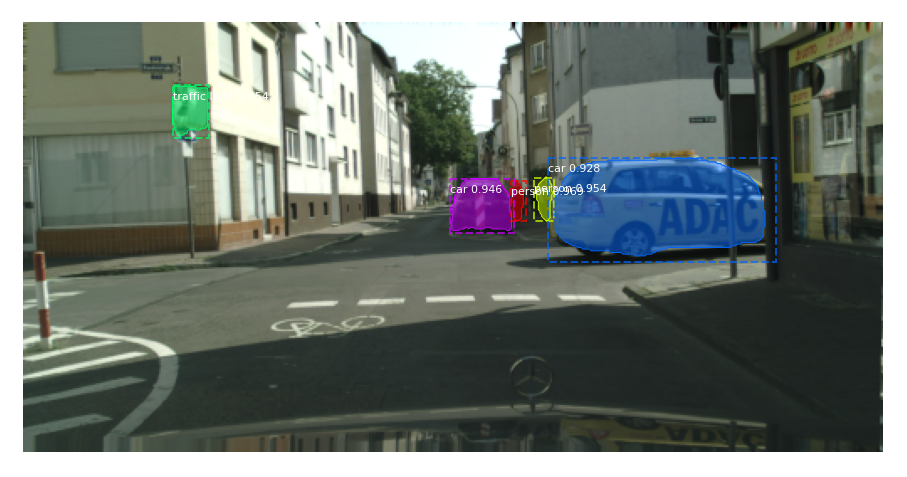

In [37]:
Mask_RCNN(temp[0])

[INFO] making predictions with Mask R-CNN...
Processing 1 images
image                    shape: (256, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


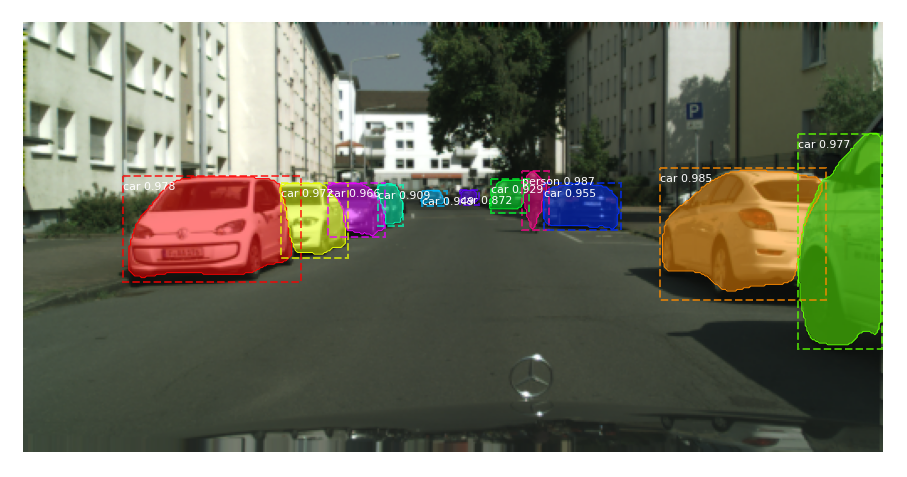

In [38]:
Mask_RCNN(temp[1])

[INFO] making predictions with Mask R-CNN...
Processing 1 images
image                    shape: (256, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


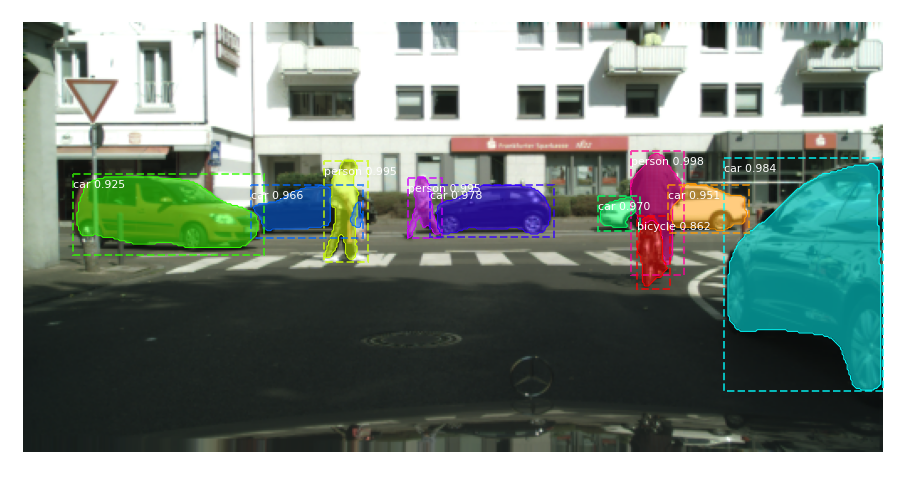

In [41]:
Mask_RCNN(temp[2])

### Conclusion:

- Hence, with the help MaskRCNN we are able to Mask the Image and Provide object Detection for each fo them

### Application: 

- Medical Application

- Autonomous driving

- Surveillance systems

### Future Scope:

- We can use OpenCV which provides real time object detection.

- We can use Detectron2 is Facebook AI Research's next generation software system that implements state-of-the-art object detection algorithms. It is a ground-up rewrite of the previous version, Detectron, and it originates from maskrcnn-benchmark.

<a href="https://github.com/facebookresearch/detectron2">Detectron 2</a>

Refrences:

- SSD official Paper: https://arxiv.org/pdf/1512.02325.pdf
- COCO Dateset: https://cocodataset.org/#home
- CityScape Dataset: https://www.cityscapes-dataset.com/
- Mask RCNN Paper:https://arxiv.org/abs/1703.06870
- Mask RCNN Official Code: https://paperswithcode.com/paper/mask-r-cnn#code



